In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')
%matplotlib inline

In [218]:
dengue_features_train = pd.read_csv('dengue_features_train.csv')
dengue_labels_train = pd.read_csv('dengue_labels_train.csv')
dengue_features_test = pd.read_csv('dengue_features_test.csv')

In [219]:
dengue_labels_train.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [220]:
dengue_train = pd.merge(dengue_features_train,dengue_labels_train)

In [221]:
dengue_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [222]:
dengue_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [223]:
dengue_train['week_start_date'] = pd.to_datetime(dengue_train['week_start_date'])

In [224]:
dengue_train['city'] = dengue_train['city'].astype('category')
dengue_train['city'] = dengue_train['city'].cat.codes

In [225]:
dengue_features_test['week_start_date'] = pd.to_datetime(dengue_features_test['week_start_date'])
dengue_features_test.drop('week_start_date',axis=1,inplace=True)


In [226]:
dengue_train.describe()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,0.642857,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,0.479322,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,0.000000,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,0.000000,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,1.000000,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,1.000000,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,1.000000,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [227]:
dengue_train.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [228]:
dengue_train.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [229]:
na_cols = ['ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']

In [230]:
for col in na_cols:
    dengue_train[col].fillna(value=dengue_train[col].mean(), inplace=True)

In [231]:
for col in na_cols:
    dengue_features_test[col].fillna(value=dengue_train[col].mean(), inplace=True)

In [232]:
dengue_train.isna().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

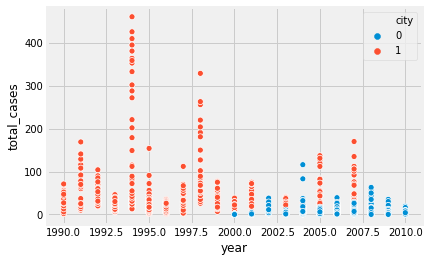

In [233]:
sns.scatterplot(dengue_train['year'], dengue_train['total_cases'],hue=dengue_train['city'])

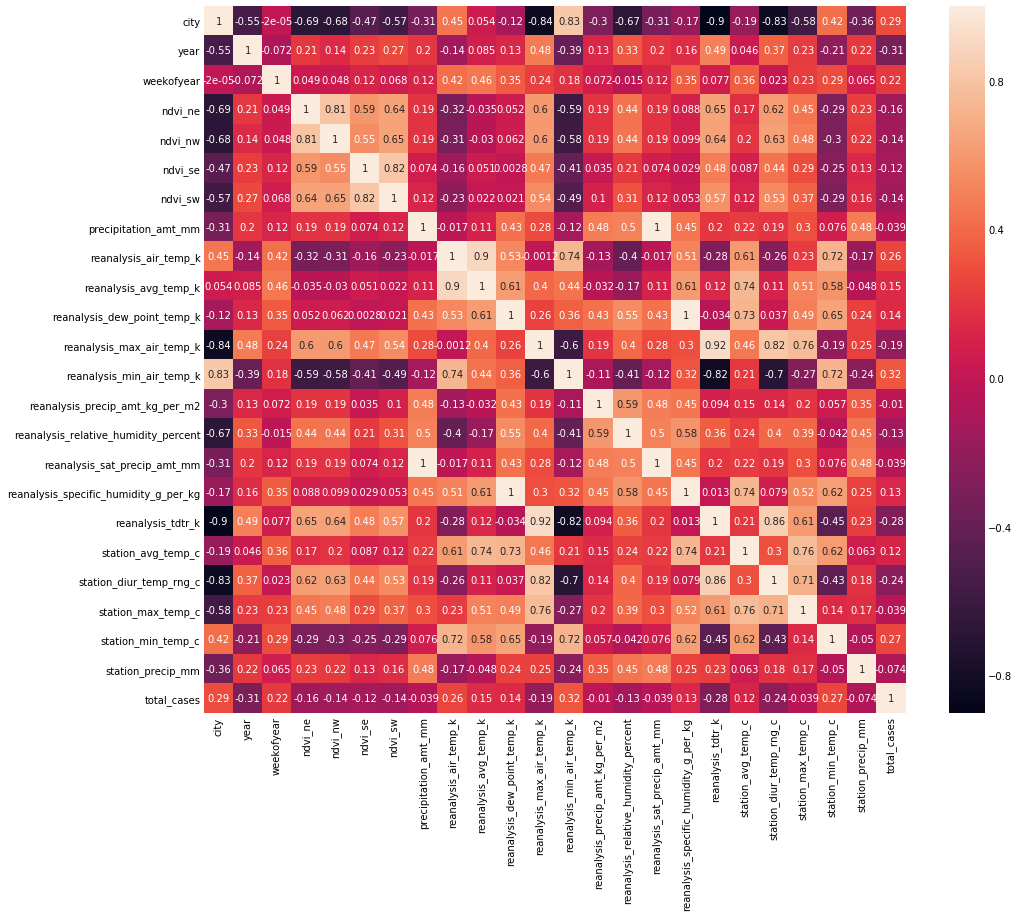

In [234]:
plt.figure(figsize=(14,13))
sns.heatmap(dengue_train.corr(), annot=True)

In [235]:
X = dengue_train[['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']]

y = dengue_train['total_cases']

In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [237]:
from sklearn.linear_model import LinearRegression

In [238]:
lm = LinearRegression()
lm.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [239]:
predictions = lm.predict(X_test)

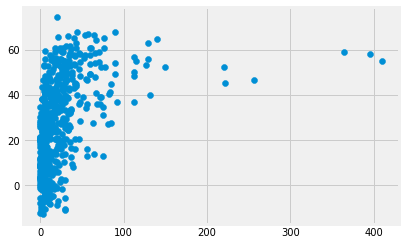

In [240]:
plt.scatter(y_test,predictions)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


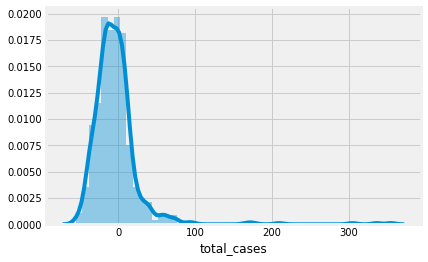

In [241]:
sns.distplot((y_test-predictions),bins=50);

In [242]:
from sklearn import metrics

In [243]:
print('MAE:', metrics.mean_absolute_error(y_test,predictions))

MAE: 19.835064677759316


In [244]:
predictions

array([ 6.09474611e+01,  4.75400754e+01,  4.35518052e+01,  2.55272867e+00,
        4.28847450e+01,  1.24445670e+01, -7.59122792e+00,  2.87415491e+00,
        5.82164180e+01,  2.72612465e+01,  3.22618694e+01, -4.16426865e+00,
        2.37048772e+01,  2.60550264e+01,  3.73002005e+01,  4.88971789e+01,
        4.08497548e+01,  4.03036977e+01, -1.02764082e+01,  2.41953595e+01,
        4.16024269e+01,  3.81222151e+01,  9.46049566e+00,  1.41166142e+01,
        5.32709387e+01,  1.09738313e+01,  5.51079412e+01,  1.28506728e+01,
        2.92299814e+01,  1.27445949e+01,  5.58435937e+01,  1.21985697e+01,
        4.73658062e+01, -3.16455924e-01,  1.95695992e+01,  2.45601925e+01,
        6.65907209e+01,  5.26678062e+01,  2.77977998e+01,  8.96925297e+00,
        8.54505567e+00,  1.50350914e+01, -6.68691785e+00,  1.02051251e+01,
        5.08471900e+00,  8.28916974e+00,  7.64632021e+00, -7.89690388e+00,
        3.53910022e+00, -7.39620962e-02, -1.69925404e+00,  3.29742195e+01,
        4.04655514e+01,  

In [248]:
predictions_real = lm.predict(dengue_features_test)

ValueError: could not convert string to float: 'sj'

In [249]:
submission1 = pd.concat([dengue_features_test['city'],dengue_features_test['year'], dengue_features_test['weekofyear'], pd.Series(predictions_real.round())],axis=1)
submission1.set_index('city',inplace=True)
submission1.columns = ['year', 'weekofyear', 'total_cases']
submission1['total_cases'] = submission1['total_cases'].astype('int64')
submission1.info()
#submission1 = pd.Series(predictions_real.round())
#submission1.to_csv('submission1')



<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, sj to iq
Data columns (total 3 columns):
year           416 non-null int64
weekofyear     416 non-null int64
total_cases    416 non-null int64
dtypes: int64(3)
memory usage: 13.0+ KB


In [250]:
submission1.head()

,year,weekofyear,total_cases
city,,,
sj,2008,18,13
sj,2008,19,9
sj,2008,20,11
sj,2008,21,16
sj,2008,22,20


In [251]:
submission1.to_csv('submission1.csv')